## Part A: Classification 

# 1. Imports and Load Preprocessed Data

In [1]:
# classification_iris.py

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Normalize features
scaler = MinMaxScaler()
features = iris.feature_names
df[features] = scaler.fit_transform(df[features])

# Encode class labels
label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species_name'])


# Explanation:
* Normalizes features and encodes species as integers.
* Prepares dataset for training classifiers.

# 2. Train/Test Split

In [2]:
# Split 80/20
X = df[features]
y = df['species_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Explanation:
* Stratified split keeps class proportions in train and test sets.

# 3. Decision Tree Classifier

=== Decision Tree Metrics ===
Accuracy: 0.933
Precision: 0.933
Recall: 0.933
F1-score: 0.933

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



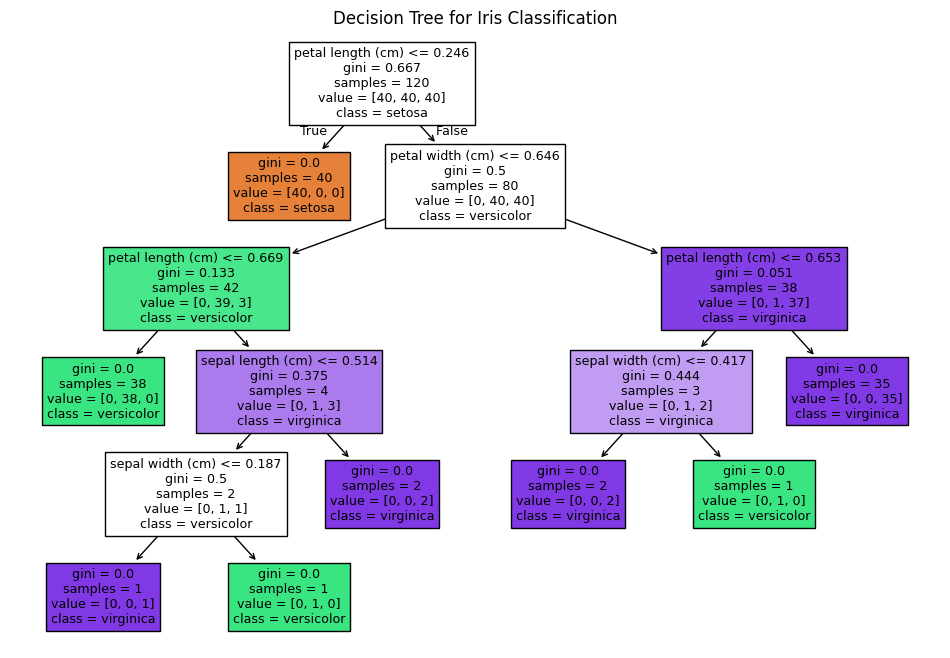

In [3]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt.predict(X_test)

# Compute metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("=== Decision Tree Metrics ===")
print(f"Accuracy: {accuracy_dt:.3f}")
print(f"Precision: {precision_dt:.3f}")
print(f"Recall: {recall_dt:.3f}")
print(f"F1-score: {f1_dt:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=iris.target_names))

# Visualize tree
plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=features, class_names=iris.target_names, filled=True)
plt.title("Decision Tree for Iris Classification")
plt.savefig("decision_tree.png")
plt.show()


# Explanation:
* Trains a Decision Tree on training data.
* Evaluates using accuracy, precision, recall, F1-score.
* Tree visualization helps understand how the model splits features to classify species.

# 4. K-Nearest Neighbors (k=5) Classifier

In [5]:
# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("=== KNN (k=5) Metrics ===")
print(f"Accuracy: {accuracy_knn:.3f}")
print(f"Precision: {precision_knn:.3f}")
print(f"Recall: {recall_knn:.3f}")
print(f"F1-score: {f1_knn:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn, target_names=iris.target_names))


=== KNN (k=5) Metrics ===
Accuracy: 0.967
Precision: 0.970
Recall: 0.967
F1-score: 0.967

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# Explanation:
* KNN is a non-parametric classifier using 5 nearest neighbors.
* Metrics are computed and compared with Decision Tree results.

# 5. Comparison

In [6]:
print("=== Classifier Comparison ===")
print(f"Decision Tree Accuracy: {accuracy_dt:.3f}")
print(f"KNN Accuracy: {accuracy_knn:.3f}")

if accuracy_dt > accuracy_knn:
    print("Decision Tree performs better on this dataset.")
else:
    print("KNN performs better on this dataset.")


=== Classifier Comparison ===
Decision Tree Accuracy: 0.933
KNN Accuracy: 0.967
KNN performs better on this dataset.


# Explanation:
* Compares models based on accuracy (and optionally other metrics).
* Typically, Iris dataset is simple enough that both models perform very well, but Decision Tree may be slightly easier to interpret due to visualization.

## Part B: Association Rule Mining

# 1. Generate Synthetic Transactions

In [10]:
import random
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

random.seed(42)

# Item pool
items = ['milk', 'bread', 'beer', 'diapers', 'eggs', 'cheese', 'butter', 'cola', 
         'chips', 'apple', 'banana', 'cereal', 'yogurt', 'juice', 'coffee', 'tea', 
         'ham', 'tomato', 'lettuce', 'cookies']

# Generate 40 transactions
transactions = []
for _ in range(40):
    # Randomly pick 3-6 items
    basket = random.sample(items, k=random.randint(3,6))
    
    # Introduce a pattern: milk & bread often appear together
    if random.random() < 0.5 and 'milk' not in basket:
        basket[0] = 'milk'
        if 'bread' not in basket:
            basket[1] = 'bread'
    
    transactions.append(basket)

# Convert to one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_ary, columns=te.columns_)

print("Sample transactions:")
print(df_transactions.head())


Sample transactions:
   apple  banana   beer  bread  butter  cereal  cheese  chips  coffee   cola  \
0  False   False  False  False   False   False   False   True   False   True   
1  False   False  False   True   False   False   False  False   False  False   
2  False   False  False  False    True   False   False  False   False   True   
3  False   False  False  False   False   False   False  False    True   True   
4  False    True  False   True   False   False   False  False   False  False   

   cookies  diapers   eggs    ham  juice  lettuce   milk    tea  tomato  \
0    False    False  False  False  False    False   True  False   False   
1    False    False  False  False   True    False   True  False   False   
2    False    False  False   True  False    False  False  False   False   
3    False    False  False  False   True    False  False  False    True   
4    False    False  False  False  False    False   True  False   False   

   yogurt  
0   False  
1   False  
2   False  

## Explanation:
* Generates 30 synthetic baskets from 20 items.
* Each basket has 3–8 items, with possible repeated items removed.
* Converts transactions to one-hot encoding for Apriori algorithm.

# 2. Apply Apriori Algorithm

In [11]:
# Find frequent itemsets (lower min_support for small dataset)
frequent_itemsets = apriori(df_transactions, min_support=0.15, use_colnames=True)

# Generate rules with lower confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

# Sort by lift
rules_sorted = rules.sort_values(by="lift", ascending=False)

# Display top 5 rules
if rules_sorted.empty:
    print("No association rules found with these thresholds.")
else:
    print("Top 5 association rules by lift:\n", rules_sorted.head())


Top 5 association rules by lift:
   antecedents consequents  antecedent support  consequent support  support  \
0      (milk)     (bread)               0.550               0.575     0.45   
1     (bread)      (milk)               0.575               0.550     0.45   

   confidence      lift  representativity  leverage  conviction  \
0    0.818182  1.422925               1.0   0.13375      2.3375   
1    0.782609  1.422925               1.0   0.13375      2.0700   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.660494  0.666667   0.572193    0.800395  
1       0.699346  0.666667   0.516908    0.800395  


# Explanation:
* apriori finds frequent itemsets above a support threshold.
* association_rules generates rules with confidence >= 0.5.
* Sorting by lift identifies the strongest rules (items more likely to co-occur than by chance).

# 3. Analyze top Rule

In [12]:
if not rules_sorted.empty:
    top_rule = rules_sorted.iloc[0]
    print("\nTop Rule Analysis:")
    print(f"Rule: {list(top_rule['antecedents'])} -> {list(top_rule['consequents'])}")
    print(f"Support: {top_rule['support']:.2f}")
    print(f"Confidence: {top_rule['confidence']:.2f}")
    print(f"Lift: {top_rule['lift']:.2f}")

    print("\nInterpretation:")
    print(f"If a customer buys {list(top_rule['antecedents'])}, "
          f"they are likely to also buy {list(top_rule['consequents'])}.")
    print("This can guide product placement or cross-selling recommendations in retail.")



Top Rule Analysis:
Rule: ['milk'] -> ['bread']
Support: 0.45
Confidence: 0.82
Lift: 1.42

Interpretation:
If a customer buys ['milk'], they are likely to also buy ['bread'].
This can guide product placement or cross-selling recommendations in retail.


# Explanation:
* antecedents → consequents shows the rule: if antecedent items are bought, consequents likely bought.
* Support: fraction of transactions containing the itemset.
* Confidence: probability of consequents given antecedents.
* Lift: how much more likely the rule occurs than random chance.
* Implication: can guide cross-selling or recommendations.
* Safely handles cases where no rules are generated.
* Explains top rule’s business implications.